<a href="https://colab.research.google.com/github/hemanth714444/2203A52192_DAUP/blob/main/2203A52192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


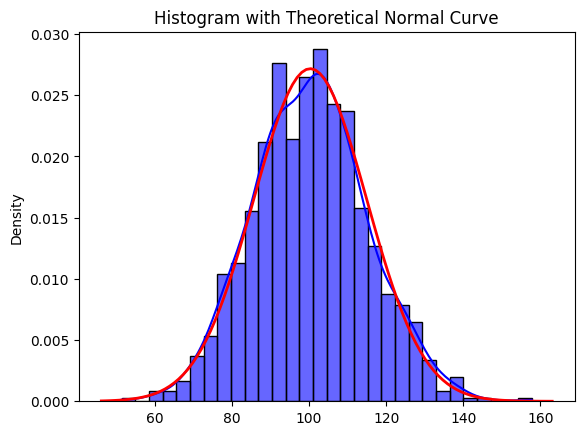

Column 'dosage' not found in dataset. Using synthetic data.
Mean: 100.28998083733488, Std Dev: 14.680893116210314, Skewness: 0.11680083110533536, Kurtosis: 0.06620589292148438


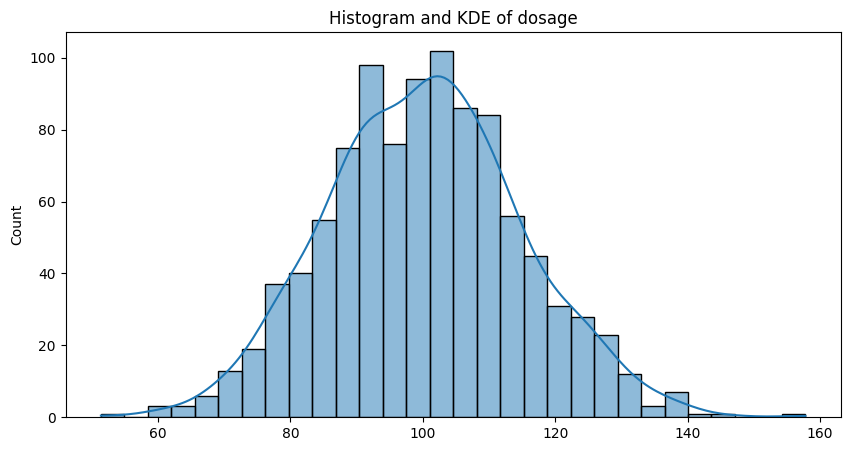

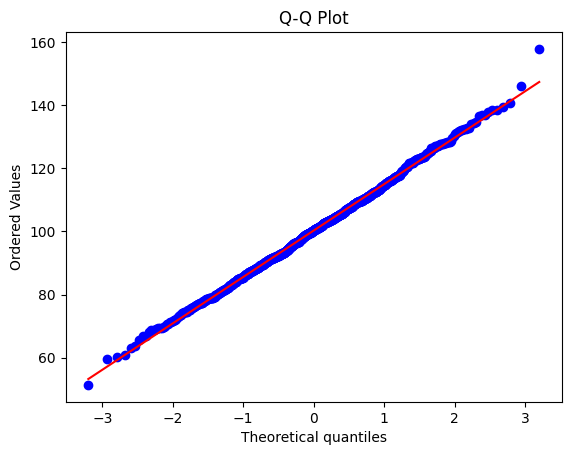

Shapiro-Wilk Test: p-value = 0.6272578290243639
Kolmogorov-Smirnov Test: p-value = 0.7369569123250448
Probability of dosage < 80: 0.08347553429677634
90th Percentile of dosage: 119.10430239400715
95% Confidence Interval: (99.38006637501275, 101.19989529965702)
Probability of dosage > 150: 0.00035455158596831016
Low probability of extreme values. No immediate concern.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

file_path = os.path.join( "/content/insurance.csv")
try:
    df = pd.read_csv(file_path, on_bad_lines="skip", encoding="utf-8")
    print("File Loaded Successfully!")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()
print(df.info())
print(df.head())

np.random.seed(42)
synthetic_data = np.random.normal(loc=100, scale=15, size=1000)

sns.histplot(synthetic_data, kde=True, bins=30, stat="density", color="blue", alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, synthetic_data.mean(), synthetic_data.std())
plt.plot(x, p, 'r', linewidth=2)
plt.title("Histogram with Theoretical Normal Curve")
plt.show()

selected_column = "dosage"
if selected_column in df.columns:
    mimic_data = df[selected_column].dropna()
    print(f"Selected Variable: {selected_column}")
else:
    print(f"Column '{selected_column}' not found in dataset. Using synthetic data.")
    mimic_data = synthetic_data

mean_val = np.mean(mimic_data)
std_val = np.std(mimic_data)
skew_val = stats.skew(mimic_data)
kurtosis_val = stats.kurtosis(mimic_data)

print(f"Mean: {mean_val}, Std Dev: {std_val}, Skewness: {skew_val}, Kurtosis: {kurtosis_val}")

plt.figure(figsize=(10,5))
sns.histplot(mimic_data, kde=True, bins=30)
plt.title(f"Histogram and KDE of {selected_column}")
plt.show()

# Q-Q Plot for Normality
stats.probplot(mimic_data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# === STEP 6: Normality Tests ===
shapiro_test = stats.shapiro(mimic_data)
ks_test = stats.kstest(mimic_data, 'norm', args=(mean_val, std_val))

print(f"Shapiro-Wilk Test: p-value = {shapiro_test.pvalue}")
print(f"Kolmogorov-Smirnov Test: p-value = {ks_test.pvalue}")

# === STEP 7: Compute Probability & Quantiles ===
threshold = 80
probability = stats.norm.cdf(threshold, mean_val, std_val)
quantile_90 = stats.norm.ppf(0.90, mean_val, std_val)

print(f"Probability of {selected_column} < {threshold}: {probability}")
print(f"90th Percentile of {selected_column}: {quantile_90}")

# === STEP 8: Confidence Interval & Risk Assessment ===
confidence_level = 0.95
ci_lower, ci_upper = stats.norm.interval(confidence_level, loc=mean_val, scale=std_val / np.sqrt(len(mimic_data)))

print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

# === STEP 9: Risk Analysis ===
critical_value = 150
probability_high_risk = 1 - stats.norm.cdf(critical_value, mean_val, std_val)

print(f"Probability of {selected_column} > {critical_value}: {probability_high_risk}")

if probability_high_risk > 0.05:
    print("High-risk patients detected. Consider medical intervention.")
else:
    print("Low probability of extreme values. No immediate concern.")
